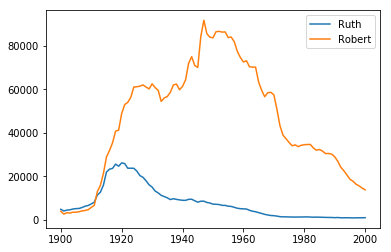

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def name_count(year):
    data_path = f'{os.getcwd()}\\names\\'
    names = pd.read_csv(data_path + 'yob' + str(year) + '.txt', names=['name', 'gender', 'count'])
    return [names[names.name == 'Ruth']['count'].sum(), names[names.name == 'Robert']['count'].sum()]

def name_dynamics(year_list):
    data = list(map(name_count, year_list))
    dynamics = pd.DataFrame(data, index = year_list)
    dynamics.columns = ['Ruth', 'Robert']
    return dynamics

years = [i for i in range(1900, 2001)]
df = name_dynamics(years)
df.plot()

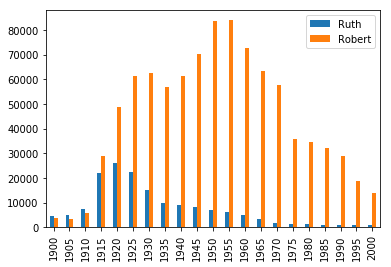

In [5]:
years = [i for i in range(1900, 2001, 5)]
df = name_dynamics(years)
df.plot.bar()

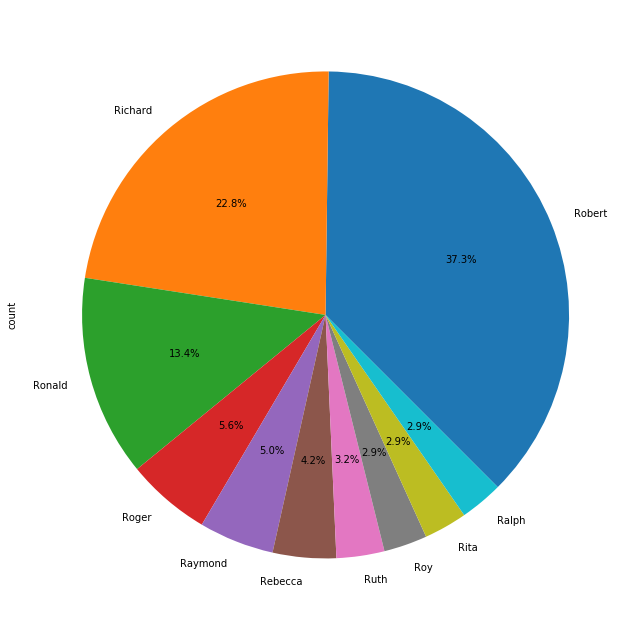

In [96]:
def get_r_names(year):
    data_path = f'{os.getcwd()}\\names\\'
    names = pd.read_csv(data_path + 'yob' + str(year) + '.txt', names=['name', 'gender', 'count'])
    r_names = names[names.name.str.startswith('R')]
    r_names = r_names.sort_values(by=['count'], ascending=False).head(10)
    del r_names['gender']
    plt.figure(figsize=(24,12))
    ax1 = plt.subplot(121, aspect='equal')
    return r_names.plot.pie(y = 'count',
                        ax=ax1,
                        startangle=-45,
                        autopct='%1.1f%%',
                        shadow=False, 
                        labels=r_names['name'],
                        legend=False)
    
result = get_r_names(1950)

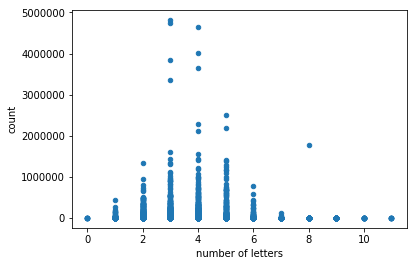

In [194]:
def all_names(year):
    data_path = f'{os.getcwd()}\\names\\'
    names = pd.read_csv(data_path + 'yob' + str(year) + '.txt', names=['name', 'gender', 'count'])
    return names

def group_names(year_list):
    data = list(map(all_names, year_list))
    data = pd.concat(data)
    data = (data.groupby('name').sum())
    return data.reset_index()

def get_consonants(name):
    a = u'aeiou'
    consonants_name = ''
    for letter in name:
        if letter.lower() not in a:
            consonants_name += letter
    return consonants_name


years = (i for i in range(1900, 2001))
names_100_years = group_names(years)
consonants_names = []
for name in names_100_years['name'].values:
    consonants_names.append(len(get_consonants(name)))

df = pd.DataFrame({'number of letters': consonants_names, 'count': names_100_years['count']})
df.plot.scatter(x='number of letters', y='count')